# Treino de uma YOLO para TASK3 
O objetivo deste notebook é ilustrar como fariamos o treino da yolo usando um dataset de "Medic tools", para reconhecimento de objetos médicos.

Esta etapa seria mais interessante sabendo que dados serão revelados para 2025.


In [2]:
import os
import shutil
from pathlib import Path
import numpy as np
import random

np.random.seed(0) 
random.seed(0)


In [3]:
# Define paths
root = Path("../Surgical-Dataset")
img_dir = root / "Images"
obj_label_dir = root / "Labels/label object names"

# YOLO structure
yolo_dir = Path("yolo_dataset")
(yolo_dir / "images/train").mkdir(parents=True, exist_ok=True)
(yolo_dir / "labels/train").mkdir(parents=True, exist_ok=True)

# Copy images and corresponding label files
for label_file in obj_label_dir.glob("*.txt"):
    img_id = label_file.stem
    img_file = img_dir / f"{img_id}.jpg"
    if img_file.exists():
        shutil.copy(img_file, yolo_dir / "images/train" / f"{img_id}.jpg")
        shutil.copy(label_file, yolo_dir / "labels/train" / f"{img_id}.txt")


In [4]:
# Mapping from label ID to name
label_map = {
    0: "bisturi",
    1: "pinca",
    2: "tesouracurva",
    3: "tesourareta",
}

# Remmaping for challange
label_remap = {
    "bisturi": "needle",
    "pinca": "clamp",
    "tesouracurva": "curved_scissor",
    "tesourareta": "straight_scissor"
}

# Save class list for YOLO
with open(yolo_dir / "classes.txt", "w") as f:
    for _, name in sorted(label_map.items()):
        f.write(f"{label_remap.get(name, name)}\n")


In [5]:
from ultralytics import YOLO
import albumentations as A

augmentation_config = {
    'hsv_h': 0.02,      # Aumentar variação de cor
    'hsv_s': 0.8,       # Aumentar saturação
    'hsv_v': 0.5,       # Aumentar brilho
    'degrees': 15.0,    # Mais rotação
    'translate': 0.2,   # Mais translação
    'scale': 0.7,       # Mais variação de escala
    'shear': 5.0,       # Adicionar shear
    'perspective': 0.001, # Perspetiva
    'flipud': 0.2,      # Flip vertical ocasional
    'fliplr': 0.5,      # Flip horizontal
    'mosaic': 1.0,      # Manter mosaic
    'mixup': 0.1,       # Adicionar mixup
}

In [6]:
from ultralytics import YOLO

# Load YOLO model
#model = YOLO('yolo11n.yaml')
model = YOLO('yolo11n.pt')

data_path = Path("yolo_dataset/data.yaml").resolve()

training_params = {
    'data': data_path,
    'epochs': 100,      # Epochs
    'imgsz': 832,       # Imagem maior para detetar objetos pequenos
    'batch': 8,         # Batch menor para imagens maiores
    'lr0': 0.005,       # Learning rate menor
    'weight_decay': 0.001,
    'warmup_epochs': 5,
    'box': 10.0,        # Aumentar peso da loss de bbox
    'cls': 1.0,         # Peso da loss de classificação
    'dfl': 2.0,         # Peso da DFL loss
    'patience': 50,     # Mais paciência
    'save_period': 10,  # Guardar checkpoints
    'val': True,
    'plots': True,
    'cache': True,      # Cache para acelerar
}

# Train
model.train(**training_params)


New https://pypi.org/project/ultralytics/8.3.145 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.139 🚀 Python-3.10.16 torch-2.7.0+cu128 CUDA:0 (NVIDIA RTX A6000, 48548MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=10.0, cache=True, cfg=None, classes=None, close_mosaic=10, cls=1.0, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/mounts/grupo1/yolo_dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=2.0, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=832, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.005, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train58, nbs=64, nms=False, opset

train: Scanning /mounts/grupo1/yolo_dataset/labels/train.cache... 3009 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3009/3009 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



train: Caching images (4.4GB RAM): 100%|██████████| 3009/3009 [00:01<00:00, 1875.74it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1508.0±1091.4 MB/s, size: 74.6 KB)


val: Scanning /mounts/grupo1/yolo_dataset/labels/train.cache... 3009 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3009/3009 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (4.4GB RAM): 100%|██████████| 3009/3009 [00:01<00:00, 1659.43it/s]


Plotting labels to runs/detect/train58/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.001), 87 bias(decay=0.0)
Image sizes 832 train, 832 val
Using 8 dataloader workers
Logging results to runs/detect/train58
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.96G      1.451       6.08      1.708          3        832: 100%|██████████| 377/377 [00:45<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:18<00:00, 10.34it/s]


                   all       3009       4207      0.397      0.645      0.564      0.406

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         2G       1.38      4.125      1.631          3        832: 100%|██████████| 377/377 [00:41<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:18<00:00, 10.43it/s]


                   all       3009       4207      0.552      0.737      0.667       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100         2G      1.341      3.278      1.601          1        832: 100%|██████████| 377/377 [00:41<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:16<00:00, 11.17it/s]


                   all       3009       4207       0.59      0.831      0.705      0.546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100         2G      1.306      2.865      1.571          0        832: 100%|██████████| 377/377 [00:40<00:00,  9.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:16<00:00, 11.46it/s]

                   all       3009       4207      0.699      0.846      0.746      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100         2G      1.318      2.699      1.579          2        832: 100%|██████████| 377/377 [00:39<00:00,  9.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:16<00:00, 11.59it/s]


                   all       3009       4207      0.641      0.786      0.669      0.533

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100         2G      1.298      2.626      1.578          1        832: 100%|██████████| 377/377 [00:41<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:15<00:00, 11.88it/s]


                   all       3009       4207      0.651      0.837      0.787      0.631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         2G      1.222      2.454      1.529          2        832: 100%|██████████| 377/377 [00:38<00:00,  9.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:11<00:00, 16.01it/s]

                   all       3009       4207       0.68      0.856      0.783      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.01G      1.183      2.322      1.499          4        832: 100%|██████████| 377/377 [00:37<00:00, 10.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:11<00:00, 16.18it/s]

                   all       3009       4207      0.763      0.826       0.85      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.01G      1.159      2.282      1.489          4        832: 100%|██████████| 377/377 [00:40<00:00,  9.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:11<00:00, 16.41it/s]

                   all       3009       4207      0.767      0.838      0.866      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.01G      1.118      2.152      1.468          3        832: 100%|██████████| 377/377 [00:38<00:00,  9.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:11<00:00, 16.50it/s]

                   all       3009       4207      0.809      0.823      0.888      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.01G       1.08      2.065      1.455          1        832: 100%|██████████| 377/377 [00:37<00:00,  9.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:11<00:00, 16.52it/s]

                   all       3009       4207      0.769       0.85      0.872      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.01G      1.059      2.004       1.44          5        832: 100%|██████████| 377/377 [00:38<00:00,  9.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:11<00:00, 16.47it/s]

                   all       3009       4207      0.816      0.852      0.902      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.01G       1.06      1.991      1.433          2        832: 100%|██████████| 377/377 [00:39<00:00,  9.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:11<00:00, 16.38it/s]

                   all       3009       4207      0.808      0.838      0.892      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.01G      1.024      1.911      1.416          5        832: 100%|██████████| 377/377 [00:40<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:11<00:00, 16.50it/s]

                   all       3009       4207      0.848      0.858      0.927      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.01G     0.9993      1.822      1.404          2        832: 100%|██████████| 377/377 [00:47<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:27<00:00,  6.77it/s]

                   all       3009       4207      0.867      0.863      0.936      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.01G     0.9889      1.793      1.395          1        832: 100%|██████████| 377/377 [01:01<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:27<00:00,  6.88it/s]

                   all       3009       4207      0.869      0.862      0.931      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.01G     0.9723      1.762       1.39          6        832: 100%|██████████| 377/377 [01:00<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:26<00:00,  7.02it/s]

                   all       3009       4207      0.866      0.863      0.928      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.01G     0.9686      1.722      1.386          4        832: 100%|██████████| 377/377 [01:02<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:32<00:00,  5.75it/s]


                   all       3009       4207      0.885      0.889      0.949      0.846

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.01G     0.9518      1.685      1.378          1        832: 100%|██████████| 377/377 [02:09<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:25<00:00,  7.53it/s]

                   all       3009       4207      0.894      0.886      0.954       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.01G     0.9388      1.664      1.372          2        832: 100%|██████████| 377/377 [00:59<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:25<00:00,  7.55it/s]

                   all       3009       4207      0.904      0.902      0.962      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.01G      0.921      1.608      1.365          5        832: 100%|██████████| 377/377 [00:55<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:23<00:00,  7.92it/s]


                   all       3009       4207      0.874      0.892      0.963      0.865

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.01G     0.9348      1.602      1.368          5        832: 100%|██████████| 377/377 [00:52<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:21<00:00,  8.89it/s]

                   all       3009       4207      0.873      0.904      0.965      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.01G     0.9128      1.553      1.357          4        832: 100%|██████████| 377/377 [00:49<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:17<00:00, 10.66it/s]

                   all       3009       4207      0.923      0.911      0.978      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.01G     0.8954      1.506      1.357          1        832: 100%|██████████| 377/377 [00:43<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:16<00:00, 11.14it/s]

                   all       3009       4207      0.939      0.931      0.981      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.01G     0.8883      1.505      1.349          4        832: 100%|██████████| 377/377 [00:43<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 12.79it/s]

                   all       3009       4207      0.932      0.926       0.98      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.01G     0.8763      1.489      1.331          0        832: 100%|██████████| 377/377 [00:37<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.02it/s]

                   all       3009       4207      0.938      0.932      0.981      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.01G     0.8774      1.454      1.337          3        832: 100%|██████████| 377/377 [00:38<00:00,  9.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 12.67it/s]

                   all       3009       4207      0.927       0.94       0.98      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.01G     0.8769      1.466      1.346          1        832: 100%|██████████| 377/377 [00:37<00:00, 10.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 12.70it/s]

                   all       3009       4207      0.938       0.94      0.984      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.01G     0.8595      1.391       1.33          1        832: 100%|██████████| 377/377 [00:36<00:00, 10.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.40it/s]


                   all       3009       4207      0.937      0.939      0.979      0.903

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.01G     0.8609      1.403      1.338          1        832: 100%|██████████| 377/377 [00:35<00:00, 10.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.39it/s]

                   all       3009       4207      0.945      0.946      0.985      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.01G     0.8607      1.421      1.332          4        832: 100%|██████████| 377/377 [00:35<00:00, 10.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.36it/s]

                   all       3009       4207      0.947      0.936      0.984      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.01G      0.838      1.318      1.313          5        832: 100%|██████████| 377/377 [00:37<00:00, 10.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.13it/s]


                   all       3009       4207      0.947      0.954      0.986      0.914

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.01G      0.846      1.341       1.32          4        832: 100%|██████████| 377/377 [00:36<00:00, 10.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 12.87it/s]

                   all       3009       4207       0.95      0.952      0.986      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.01G     0.8175      1.269       1.31          5        832: 100%|██████████| 377/377 [00:36<00:00, 10.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:13<00:00, 13.58it/s]

                   all       3009       4207      0.948      0.956      0.987      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.01G     0.8174      1.283      1.313          4        832: 100%|██████████| 377/377 [00:35<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.40it/s]


                   all       3009       4207      0.955      0.956      0.988      0.924

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.01G     0.8031      1.262      1.305          1        832: 100%|██████████| 377/377 [00:35<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.06it/s]

                   all       3009       4207      0.961      0.961      0.989      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.01G     0.7928      1.249        1.3          3        832: 100%|██████████| 377/377 [00:35<00:00, 10.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:13<00:00, 13.63it/s]

                   all       3009       4207      0.951      0.968       0.99      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.01G     0.7966      1.213      1.296          5        832: 100%|██████████| 377/377 [00:35<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:13<00:00, 13.72it/s]

                   all       3009       4207      0.966      0.966       0.99      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.01G     0.7872      1.227      1.297          4        832: 100%|██████████| 377/377 [00:35<00:00, 10.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.10it/s]


                   all       3009       4207      0.952      0.951      0.988      0.924

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.01G     0.7739      1.188      1.289          1        832: 100%|██████████| 377/377 [00:35<00:00, 10.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.41it/s]

                   all       3009       4207      0.967      0.971      0.991      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.01G     0.7929      1.204      1.292          6        832: 100%|██████████| 377/377 [00:35<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.13it/s]

                   all       3009       4207      0.967      0.975      0.992      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.01G     0.7605      1.151      1.281          2        832: 100%|██████████| 377/377 [00:35<00:00, 10.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.04it/s]

                   all       3009       4207      0.968      0.973      0.991      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.01G      0.784      1.155      1.291          3        832: 100%|██████████| 377/377 [00:35<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.36it/s]

                   all       3009       4207      0.972      0.968       0.99      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.01G     0.7579      1.163       1.28          3        832: 100%|██████████| 377/377 [00:35<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:13<00:00, 13.58it/s]


                   all       3009       4207      0.966      0.971       0.99      0.928

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.01G     0.7479      1.156      1.277          2        832: 100%|██████████| 377/377 [00:35<00:00, 10.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.43it/s]

                   all       3009       4207      0.974      0.974      0.993      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.01G     0.7591      1.133      1.284          3        832: 100%|██████████| 377/377 [00:35<00:00, 10.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.33it/s]

                   all       3009       4207      0.977      0.971      0.993      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.01G     0.7464      1.122      1.275          2        832: 100%|██████████| 377/377 [00:35<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.23it/s]

                   all       3009       4207      0.967      0.967      0.991      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.01G     0.7387      1.112       1.27          1        832: 100%|██████████| 377/377 [00:36<00:00, 10.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.02it/s]

                   all       3009       4207      0.975      0.977      0.993      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.01G     0.7413      1.088      1.272          2        832: 100%|██████████| 377/377 [00:35<00:00, 10.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.39it/s]


                   all       3009       4207       0.98      0.978      0.993      0.942

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.01G     0.7369      1.085      1.273          1        832: 100%|██████████| 377/377 [00:35<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.00it/s]

                   all       3009       4207      0.973       0.98      0.993      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.01G     0.7298      1.077      1.264          4        832: 100%|██████████| 377/377 [00:36<00:00, 10.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 12.68it/s]

                   all       3009       4207      0.982      0.979      0.993      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.01G     0.7126      1.032      1.259          1        832: 100%|██████████| 377/377 [00:36<00:00, 10.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.20it/s]

                   all       3009       4207      0.979      0.982      0.993      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.01G     0.7217      1.069      1.272          1        832: 100%|██████████| 377/377 [00:35<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.34it/s]

                   all       3009       4207      0.982      0.978      0.993      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.01G     0.7121      1.033       1.26          8        832: 100%|██████████| 377/377 [00:36<00:00, 10.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.03it/s]

                   all       3009       4207      0.983      0.986      0.994      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.01G     0.7042      1.043      1.262          3        832: 100%|██████████| 377/377 [00:36<00:00, 10.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.01it/s]

                   all       3009       4207      0.983      0.984      0.994      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.01G     0.6956      1.031      1.261          3        832: 100%|██████████| 377/377 [00:35<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:13<00:00, 13.58it/s]

                   all       3009       4207      0.981      0.985      0.994      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.01G     0.6871      0.988       1.25          3        832: 100%|██████████| 377/377 [00:35<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.46it/s]

                   all       3009       4207      0.983      0.988      0.994       0.95



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.01G      0.689      1.015      1.257          1        832: 100%|██████████| 377/377 [00:35<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:13<00:00, 13.55it/s]

                   all       3009       4207      0.987      0.985      0.994      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.01G     0.6912      1.003      1.252          7        832: 100%|██████████| 377/377 [00:35<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.17it/s]

                   all       3009       4207      0.984      0.988      0.994      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.01G     0.6836      0.989      1.248          4        832: 100%|██████████| 377/377 [00:35<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.42it/s]

                   all       3009       4207      0.985      0.987      0.994      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.01G     0.6711     0.9773      1.245          2        832: 100%|██████████| 377/377 [00:36<00:00, 10.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.47it/s]

                   all       3009       4207      0.984      0.985      0.994      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.01G     0.6834     0.9978      1.248          2        832: 100%|██████████| 377/377 [00:35<00:00, 10.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:13<00:00, 13.55it/s]

                   all       3009       4207      0.984      0.987      0.994      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.01G     0.6694     0.9512      1.245          1        832: 100%|██████████| 377/377 [00:36<00:00, 10.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.45it/s]

                   all       3009       4207      0.988      0.988      0.994      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.01G     0.6641      0.947       1.24          4        832: 100%|██████████| 377/377 [00:35<00:00, 10.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.37it/s]

                   all       3009       4207      0.991      0.987      0.994      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.01G     0.6601     0.9568      1.241          3        832: 100%|██████████| 377/377 [00:35<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.24it/s]

                   all       3009       4207      0.986      0.989      0.994      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.01G     0.6596      0.943      1.235          4        832: 100%|██████████| 377/377 [00:35<00:00, 10.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.12it/s]

                   all       3009       4207      0.985      0.991      0.994      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.01G     0.6575     0.9351      1.235          3        832: 100%|██████████| 377/377 [00:36<00:00, 10.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:13<00:00, 13.76it/s]

                   all       3009       4207      0.989      0.989      0.994      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.01G     0.6574     0.9486      1.241          2        832: 100%|██████████| 377/377 [00:35<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.23it/s]

                   all       3009       4207      0.991      0.988      0.994      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.01G     0.6343     0.8907      1.227          5        832: 100%|██████████| 377/377 [00:35<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.40it/s]

                   all       3009       4207       0.99      0.991      0.994      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.01G     0.6343     0.8721      1.228          2        832: 100%|██████████| 377/377 [00:35<00:00, 10.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:13<00:00, 13.64it/s]

                   all       3009       4207       0.99      0.991      0.994      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.01G     0.6312      0.889      1.228          2        832: 100%|██████████| 377/377 [00:35<00:00, 10.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.24it/s]

                   all       3009       4207      0.991      0.989      0.994      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.01G     0.6403     0.9076       1.23          1        832: 100%|██████████| 377/377 [00:35<00:00, 10.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.26it/s]

                   all       3009       4207      0.992      0.989      0.994      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.01G     0.6223     0.8836      1.225          7        832: 100%|██████████| 377/377 [00:36<00:00, 10.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.33it/s]

                   all       3009       4207      0.987       0.99      0.994      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.01G     0.6254     0.8692      1.226          4        832: 100%|██████████| 377/377 [00:35<00:00, 10.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:13<00:00, 13.60it/s]


                   all       3009       4207       0.99       0.99      0.994      0.961

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.01G     0.6209     0.8633      1.219          6        832: 100%|██████████| 377/377 [00:35<00:00, 10.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.31it/s]

                   all       3009       4207      0.991       0.99      0.994      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.01G     0.6092     0.8397      1.226          1        832: 100%|██████████| 377/377 [00:36<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.26it/s]

                   all       3009       4207      0.993      0.991      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.01G     0.6162     0.8496      1.221          3        832: 100%|██████████| 377/377 [00:36<00:00, 10.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.27it/s]

                   all       3009       4207      0.993      0.993      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.01G     0.6163     0.8606      1.228          1        832: 100%|██████████| 377/377 [00:35<00:00, 10.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 12.95it/s]

                   all       3009       4207      0.993      0.994      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.01G     0.6052     0.8514      1.217          2        832: 100%|██████████| 377/377 [00:36<00:00, 10.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.36it/s]

                   all       3009       4207      0.991      0.993      0.994      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.01G     0.6031     0.8283      1.214          2        832: 100%|██████████| 377/377 [00:35<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.14it/s]

                   all       3009       4207      0.994      0.993      0.994      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.01G     0.6082     0.8475      1.217          3        832: 100%|██████████| 377/377 [00:35<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:13<00:00, 13.55it/s]

                   all       3009       4207      0.993      0.993      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.01G     0.6127     0.8546      1.218          1        832: 100%|██████████| 377/377 [00:35<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:13<00:00, 13.59it/s]

                   all       3009       4207      0.993      0.991      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.01G     0.5971     0.8317      1.208          0        832: 100%|██████████| 377/377 [00:36<00:00, 10.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.24it/s]

                   all       3009       4207      0.993      0.992      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.01G     0.5989     0.8337      1.213          1        832: 100%|██████████| 377/377 [00:35<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.41it/s]

                   all       3009       4207      0.994      0.993      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.01G     0.5778     0.8081      1.209          3        832: 100%|██████████| 377/377 [00:36<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:13<00:00, 13.75it/s]

                   all       3009       4207      0.995      0.992      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.01G     0.5713     0.7902      1.204          1        832: 100%|██████████| 377/377 [00:35<00:00, 10.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:13<00:00, 13.51it/s]

                   all       3009       4207      0.994      0.995      0.995      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.01G      0.575     0.7918      1.199          0        832: 100%|██████████| 377/377 [00:35<00:00, 10.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.39it/s]

                   all       3009       4207      0.992      0.994      0.995      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.01G     0.5753     0.8002      1.203          2        832: 100%|██████████| 377/377 [00:35<00:00, 10.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.45it/s]

                   all       3009       4207      0.993      0.994      0.995      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.01G     0.5662     0.7848      1.203          0        832: 100%|██████████| 377/377 [00:35<00:00, 10.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:13<00:00, 13.78it/s]

                   all       3009       4207      0.992      0.995      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.01G     0.5662     0.7766      1.206          3        832: 100%|██████████| 377/377 [00:36<00:00, 10.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:13<00:00, 13.69it/s]


                   all       3009       4207      0.994      0.995      0.995       0.97
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.01G     0.4304     0.4937      1.113          2        832: 100%|██████████| 377/377 [00:36<00:00, 10.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.06it/s]

                   all       3009       4207      0.994      0.994      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.01G     0.4232     0.4948      1.105          1        832: 100%|██████████| 377/377 [00:35<00:00, 10.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.30it/s]

                   all       3009       4207      0.994      0.994      0.994      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.01G     0.4142     0.4765      1.106          2        832: 100%|██████████| 377/377 [00:35<00:00, 10.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.22it/s]

                   all       3009       4207      0.991      0.997      0.995      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.01G       0.41     0.4708      1.103          4        832: 100%|██████████| 377/377 [00:35<00:00, 10.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.27it/s]

                   all       3009       4207      0.995      0.994      0.995       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.01G     0.3969     0.4599      1.095          2        832: 100%|██████████| 377/377 [00:35<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:13<00:00, 13.55it/s]

                   all       3009       4207      0.995      0.996      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.01G     0.4053     0.4642      1.098          1        832: 100%|██████████| 377/377 [00:35<00:00, 10.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:13<00:00, 13.63it/s]


                   all       3009       4207      0.995      0.995      0.995      0.972

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.01G     0.4001     0.4631      1.097          4        832: 100%|██████████| 377/377 [00:35<00:00, 10.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.09it/s]

                   all       3009       4207      0.995      0.996      0.995      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.01G     0.3955     0.4515      1.097          1        832: 100%|██████████| 377/377 [00:35<00:00, 10.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:13<00:00, 13.53it/s]

                   all       3009       4207      0.996      0.996      0.995      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.01G     0.3919     0.4481      1.098          1        832: 100%|██████████| 377/377 [00:35<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.27it/s]

                   all       3009       4207      0.996      0.996      0.995      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.01G     0.3883     0.4438      1.095          2        832: 100%|██████████| 377/377 [00:35<00:00, 10.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:13<00:00, 13.61it/s]

                   all       3009       4207      0.995      0.997      0.995      0.973



100 epochs completed in 1.529 hours.
Optimizer stripped from runs/detect/train58/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train58/weights/best.pt, 5.5MB

Validating runs/detect/train58/weights/best.pt...
Ultralytics 8.3.139 🚀 Python-3.10.16 torch-2.7.0+cu128 CUDA:0 (NVIDIA RTX A6000, 48548MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [00:14<00:00, 13.42it/s]


                   all       3009       4207      0.995      0.997      0.995      0.973
                needle       1038       1038      0.994      0.993      0.995      0.963
                 clamp       1056       1056      0.989      0.995      0.994      0.949
        curved_scissor        971        971      0.996          1      0.995      0.989
      straight_scissor       1142       1142          1      0.999      0.995       0.99
Speed: 0.2ms preprocess, 0.8ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train58


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b4d79301630>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [7]:
import shutil
shutil.copy("runs/detect/train2/weights/best.pt", "/mounts/grupo1/yolo_models/task3yoloTrained3.pt")

'/mounts/grupo1/yolo_models/task3yoloTrained3.pt'

Imagem selecionada: /mounts/grupo1/yolo_dataset/images/train/separado64.jpg

image 1/1 /mounts/grupo1/yolo_dataset/images/train/separado64.jpg: 480x640 1 needle, 1 clamp, 1 curved_scissor, 1 straight_scissor, 7.1ms
Speed: 0.8ms preprocess, 7.1ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


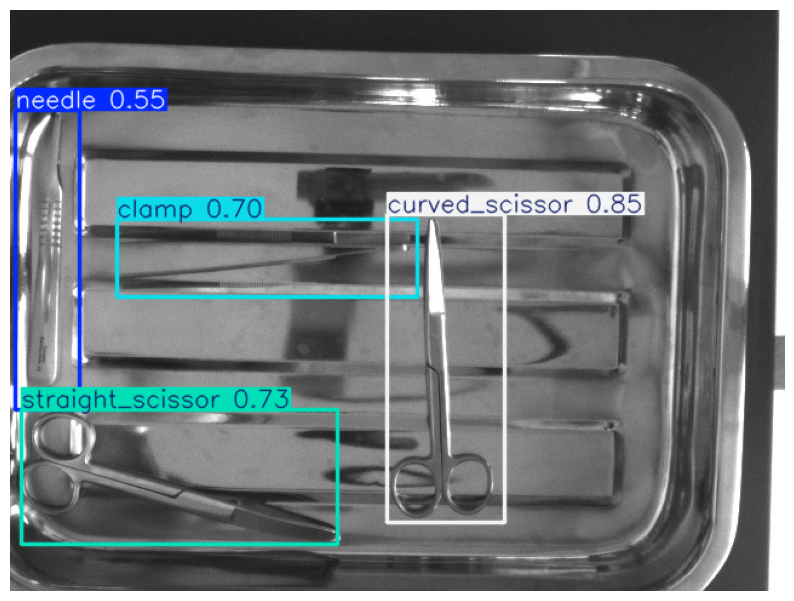

In [31]:
%matplotlib inline

import random
from pathlib import Path
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt

img_dir = Path("/mounts/grupo1/yolo_dataset/images/train")
imgs = list(img_dir.glob("*.jpg"))

# random image
img_path = random.choice(imgs)
print(f"Imagem selecionada: {img_path}")

model = YOLO("/mounts/grupo1/yolo_models/YoloULTRAmegaBLASTIKtralala2.pt")

results = model(img_path)

result_img = results[0].plot()  

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
